In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy.core as owm
from urllib.error import HTTPError

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Build query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
# Define settings and keys
settings = {'units':'Imperial','appid':weather_api_key}
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat =[]
lng =[]
cities_list = []

In [32]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing Record {counter} | {city}')
    print(city_url)
    try:
        city_data = owm.get_current(city,**settings)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. skipping...')
    counter += 1
print('---------------------')
print('Data Retrieval Complete')
print('---------------------')

Beginning Data Retrieval
---------------------
Processing Record 1 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d632796ba33fbf582fd7d97c8370870b&q=east+london
Processing Record 2 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d632796ba33fbf582fd7d97c8370870b&q=albany
Processing Record 3 | pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d632796ba33fbf582fd7d97c8370870b&q=pangody
Processing Record 4 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d632796ba33fbf582fd7d97c8370870b&q=ponta+do+sol
Processing Record 5 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d632796ba33fbf582fd7d97c8370870b&q=butaritari
Processing Record 6 | linxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d632796ba33fbf582fd7d97c8370870b&q=linxia
Processing Record 7 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Im

In [34]:
weather_df = pd.DataFrame({
     'City':cities_list,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.head()
weather_df.to_csv(output_data_file)

#### Latitude vs. Temperature Plot

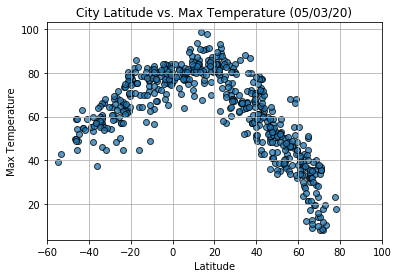

In [70]:
    plt.scatter(weather_df['Lat'],weather_df['Max Temperature'],alpha=0.75,edgecolors='black')
    plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
    plt.xlabel('Latitude') 
    plt.ylabel('Max Temperature')
    plt.xlim(-60,100)
    plt.grid(True)
    plt.savefig("output_data/Fig1.png")

#### Latitude vs. Humidity Plot

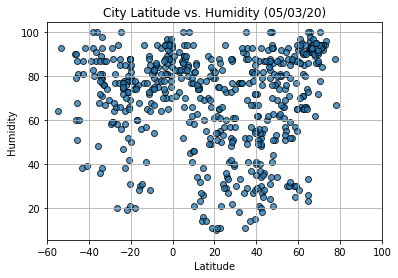

In [73]:
    plt.scatter(weather_df['Lat'],weather_df['Humidity'],alpha=0.75,edgecolors='black')
    plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
    plt.xlabel('Latitude') 
    plt.ylabel('Humidity')
    plt.xlim(-60,100)
    plt.grid(True)
    plt.savefig("output_data/Fig2.png")

#### Latitude vs. Cloudiness Plot

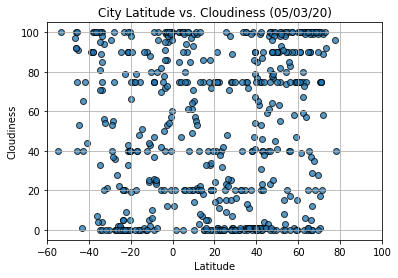

In [75]:
    plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],alpha=0.75,edgecolors='black')
    plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
    plt.xlabel('Latitude') 
    plt.ylabel('Cloudiness')
    plt.xlim(-60,100)
    plt.grid(True)
    plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

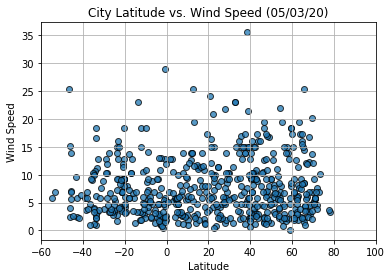

In [76]:
    plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],alpha=0.75,edgecolors='black')
    plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
    plt.xlabel('Latitude') 
    plt.ylabel('Wind Speed')
    plt.xlim(-60,100)
    plt.grid(True)
    plt.savefig("output_data/Fig4.png")

Max Temp: There is a relationship between latitude and maximum temperature as the maxiumum temperature increases the closer the city is to the equator which is at 0 degrees.
Humidity: While a relationship between latitude and humidity doesn't appear to exist, there is a concentration of cities with 100% humidity.
Cloudiness: While a relationship between latitude and cloudiness doesn't appear to exist, there is a concentration of cities with both 0% and 100% cloudiness.
Wind Speed: While a relationship between latitude and wind speed doesn't appear to exist, there is a concentration of cities in the Northern Hemisphere with higher wind speeds.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.885561187413229


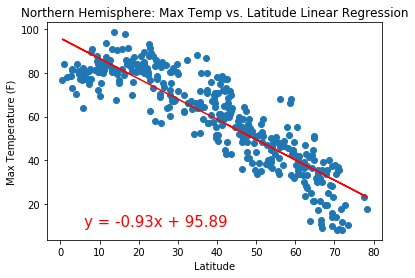

In [81]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7630553619977845


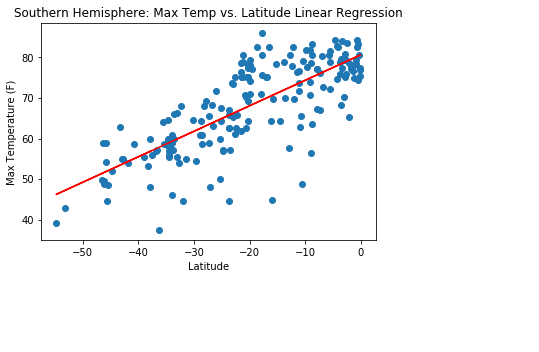

In [82]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2271284970497818


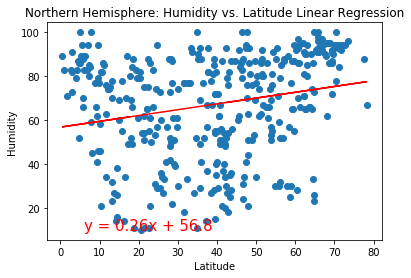

In [83]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12708974645811622


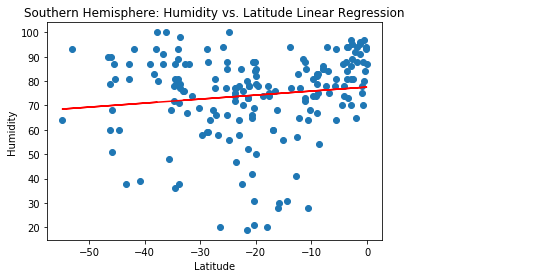

In [84]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2073919499170119


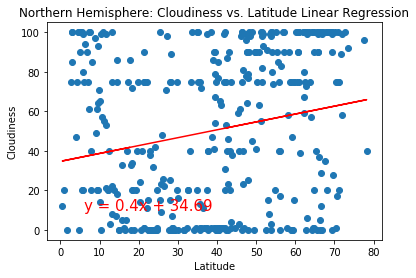

In [85]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028163786301844945


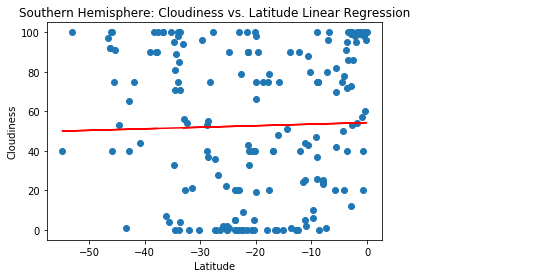

In [86]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01743728116932654


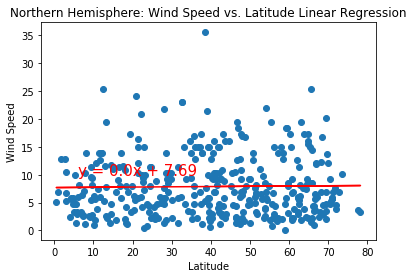

In [87]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09585756291460584


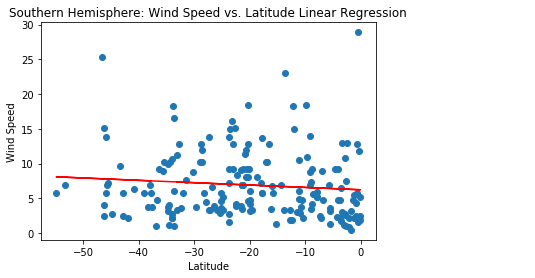

In [88]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

Out of the four variables examined through regression, only Max Temperature showed a correlation with Latitude. Both in the Northern Hemisphere and the Southern Hemisphere, the closer to 0 was the warmer the temperature. Moving away from 0 in either direction the cooler the temperature.